In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,confusion_matrix,r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
df=pd.DataFrame(X,columns=cancer.feature_names)
df['cancer']=pd.Categorical.from_codes(y,cancer.target_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [6]:
scalar=StandardScaler()

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [8]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [9]:
y_pred=model.predict(X_test)

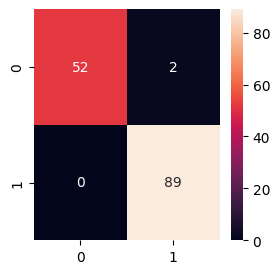

In [10]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [11]:
accuracy_score(y_test,y_pred)

0.986013986013986

In [12]:
precision_score(y_test,y_pred)

0.978021978021978

In [13]:
recall_score(y_test,y_pred)

1.0

In [14]:
r2_score(y_test,y_pred)

0.9404910528506034

In [15]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.11826247919781652

<Axes: xlabel='cancer', ylabel='count'>

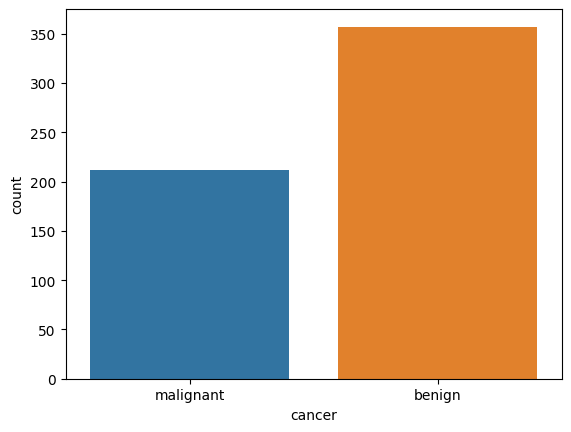

In [16]:
sns.countplot(x='cancer',data=df,hue='cancer')